In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
model_vgg16        = tf.keras.applications.vgg16.VGG16()
model_resnet50     = tf.keras.applications.resnet50.ResNet50()
model_inception_v3 = tf.keras.applications.inception_v3.InceptionV3()

In [3]:
import os
from os import listdir
image_paths = []
for image in os.listdir('Frames'):
    image_paths.append('Frames/'+image)
len(image_paths)

90

In [10]:
import random
selected_frames=random.choices(image_paths,k=8)

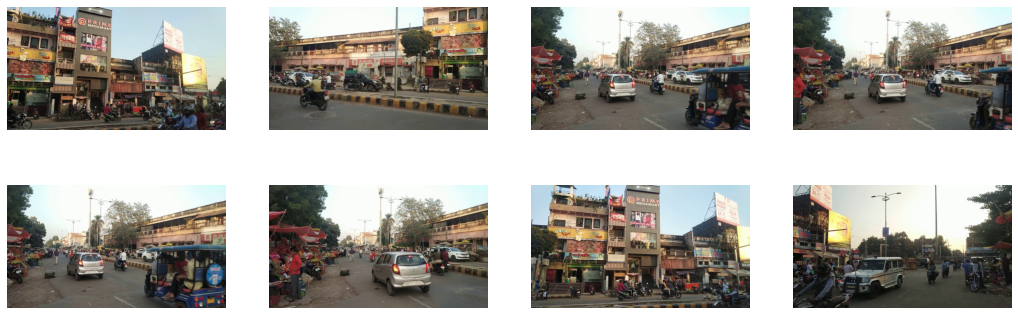

In [11]:
plt.figure(figsize=(18, 6))
for idx, image_path in enumerate(selected_frames):
    image = plt.imread(image_path)
    plt.subplot(2,4,idx+1)
    plt.imshow(image)
    plt.axis('off')

In [12]:
def process_images(model, image_paths, size, preprocess_input, display_top_k=False, top_k=2):

    plt.figure(figsize=(20,7))
    for idx, image_path in enumerate(image_paths):

        # Read the image using TensorFlow.
        tf_image = tf.io.read_file(image_path)

        # Decode the above `tf_image` from a Bytes string to a numeric Tensor.
        decoded_image = tf.image.decode_image(tf_image)

        # Resize the image to the spatial size required by the model.
        image_resized = tf.image.resize(decoded_image, size)

        # Add a batch dimension to the first axis (required).
        image_batch = tf.expand_dims(image_resized, axis=0)

        # Pre-process the input image.
        image_batch = preprocess_input(image_batch)

        # Forward pass through the model to make predictions.
        preds = model.predict(image_batch)

        # Decode (and rank the top-k) predictions.
        # Returns a list of tuples: (class ID, class description, probability)
        decoded_preds = tf.keras.applications.imagenet_utils.decode_predictions(
            preds=preds,
            top=5
        )

        if display_top_k == True:
            for jdx in range(top_k):
                print("Top {} predicted class:   Pr(Class={:20} [index={:4}]) = {:5.2f}".format(
                    jdx + 1, decoded_preds[0][jdx][1], jdx, decoded_preds[0][jdx][2] * 100))

        plt.subplot(2,4,idx+1)
        plt.imshow(decoded_image)
        plt.axis('off')
        label = decoded_preds[0][0][1]
        score = decoded_preds[0][0][2] * 100
        title = label + ' ' + str('{:.2f}%'.format(score))
        plt.title(title, fontsize=16)

1/1 [==============================] - 0s 234ms/step


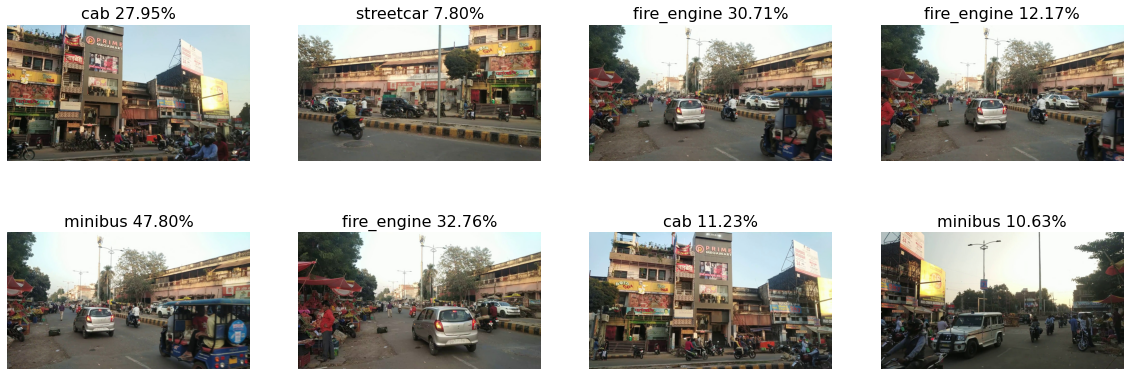

In [13]:
model = model_vgg16
size = (224, 224)

preprocess_input = tf.keras.applications.vgg16.preprocess_input

process_images(model, selected_frames, size, preprocess_input)

1/1 [==============================] - 0s 171ms/step


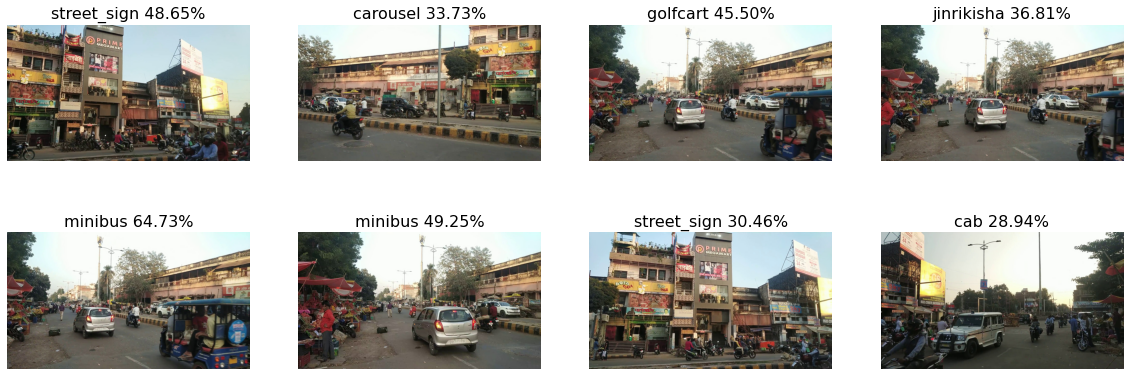

In [14]:
model = model_resnet50
size = (224, 224)

preprocess_input = tf.keras.applications.resnet50.preprocess_input

process_images(model, selected_frames, size, preprocess_input)

1/1 [==============================] - 0s 142ms/step
Top 1 predicted class:   Pr(Class=scoreboard           [index=   0]) =  7.10
Top 2 predicted class:   Pr(Class=cab                  [index=   1]) =  4.39
1/1 [==============================] - 0s 151ms/step
Top 1 predicted class:   Pr(Class=restaurant           [index=   0]) = 13.05
Top 2 predicted class:   Pr(Class=go-kart              [index=   1]) =  7.62
1/1 [==============================] - 0s 156ms/step
Top 1 predicted class:   Pr(Class=minibus              [index=   0]) = 33.89
Top 2 predicted class:   Pr(Class=ambulance            [index=   1]) = 16.26
1/1 [==============================] - 0s 159ms/step
Top 1 predicted class:   Pr(Class=garbage_truck        [index=   0]) = 16.19
Top 2 predicted class:   Pr(Class=tow_truck            [index=   1]) = 12.12
1/1 [==============================] - 0s 140ms/step
Top 1 predicted class:   Pr(Class=golfcart             [index=   0]) = 62.64
Top 2 predicted class:   Pr(Class=minibus 

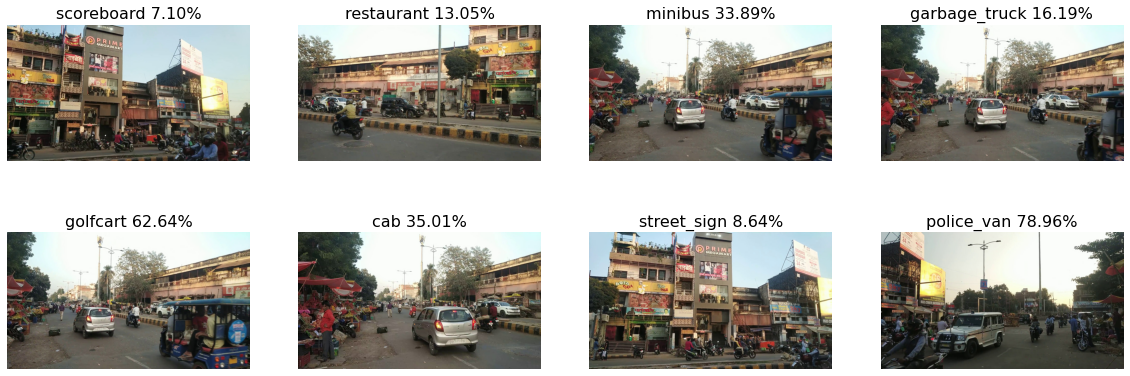

In [15]:
model = model_inception_v3
size = (299, 299)

preprocess_input = tf.keras.applications.inception_v3.preprocess_input

process_images(model, selected_frames, size, preprocess_input, display_top_k=True)